In [1]:
import requests
import warnings
import pickle
import time
import json
from tqdm import tqdm
from functools import wraps
from datetime import datetime
from typing import Dict, List, Union, Callable, Any, Optional
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kstest
import math
from tqdm import tqdm
import pandas as pd
from NetworkAnalysis import Graph, StructAnalysis, CommunityDetection
from parse import VKMutual

ACCESS_TOKEN = '*****'
API_V = '5.130'

# Получение словаря из друзей в VK

In [2]:
a = VKMutual(ACCESS_TOKEN, API_V)
mutual = a.get_mutual_friends()
friends_info = a.get_friends()

# Создание графа на основе полученного словаря

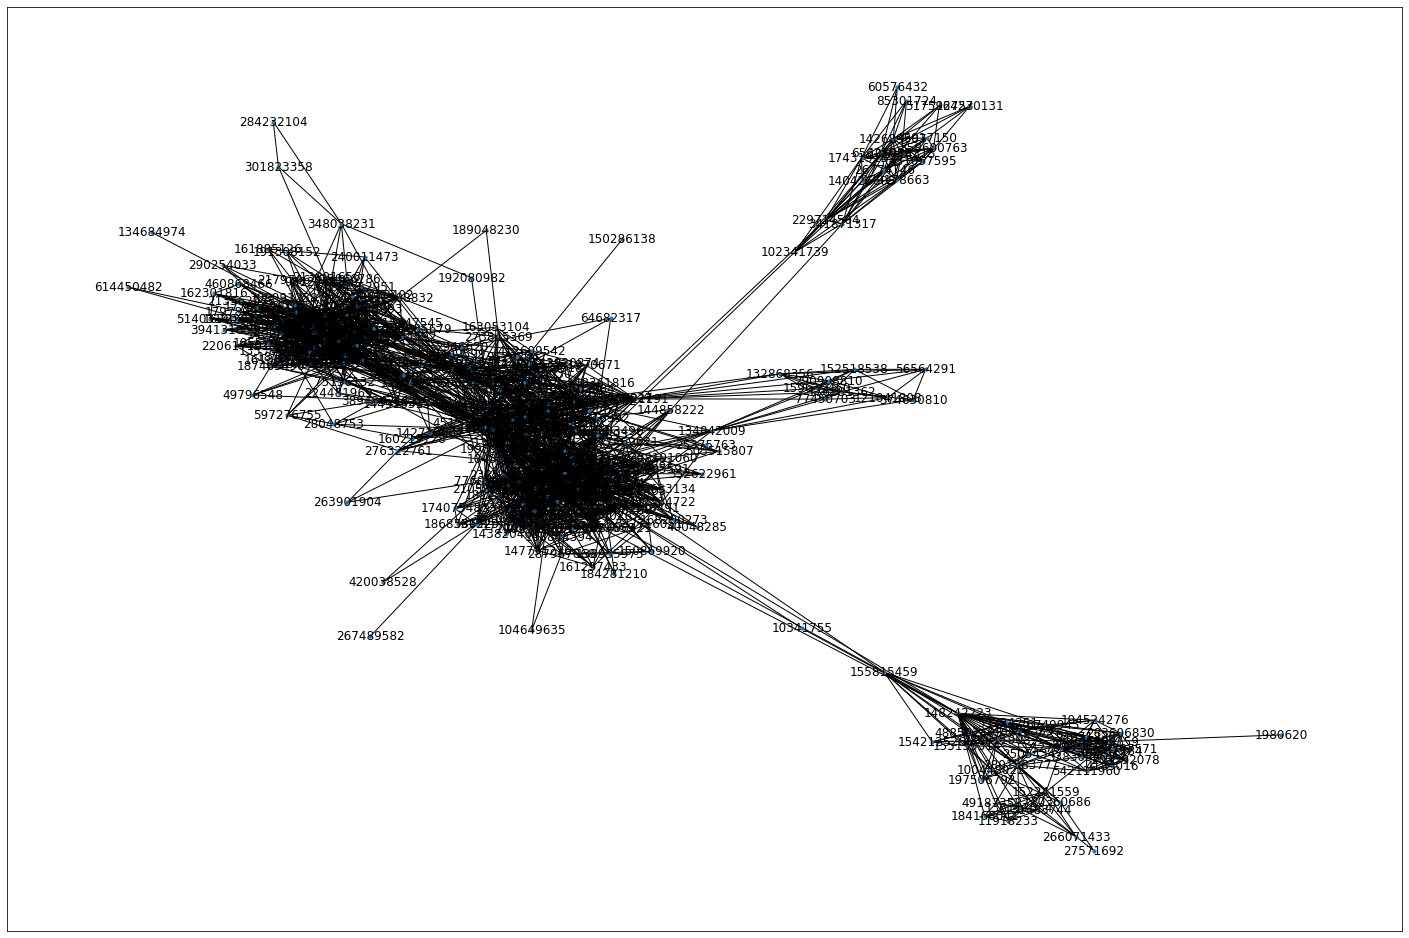

In [3]:
Gr = Graph(mutual)
# Внутри класса Graph словарь из друзей преобразовывается в граф
graph = Gr.plot_G()

# Базовая информация о графе

In [4]:
Gr.base_info()

Connected? True
Radius: 4
Diameter: 7
Average shortest path length: 2.988202973497091
Average clustering coefficient: 0.5676199804637173
Number of nodes and edges: Graph with 273 nodes and 2235 edges


# Гистограмма для average path length

100%|██████████████████████████████████████████████████████████████████████████████| 273/273 [00:00<00:00, 1761.09it/s]


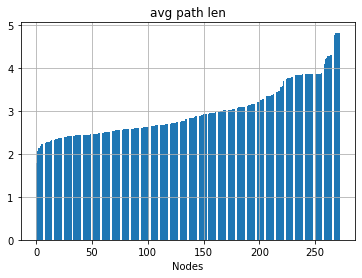

In [5]:
Gr.plot_hist_apl()

# Struct analysis

# Сравниваем наш граф с рандомными графами(ER, BA, WS)

In [6]:
sa = StructAnalysis(mutual)
a = sa.random_graphs()
a

,clustering,avg path len,diameter,radius
my graph,0.567620,2.988203,7,4
erdos-renyi,0.057912,2.313429,4,3
barabasi-albert,0.195272,1.940961,3,2
watts-strogatz,0.525328,2.796542,4,4


# Здесь мы строим график центральностей для Degree, Closeness, Betweenness 

Degree centrality


,id,centrality
0,182122064,0.415441
1,230582966,0.250000
2,328751017,0.198529
3,503107476,0.194853
4,356272769,0.187500
...,...,...
268,614450482,0.007353
269,267489582,0.003676
270,1980620,0.003676
271,134684974,0.003676


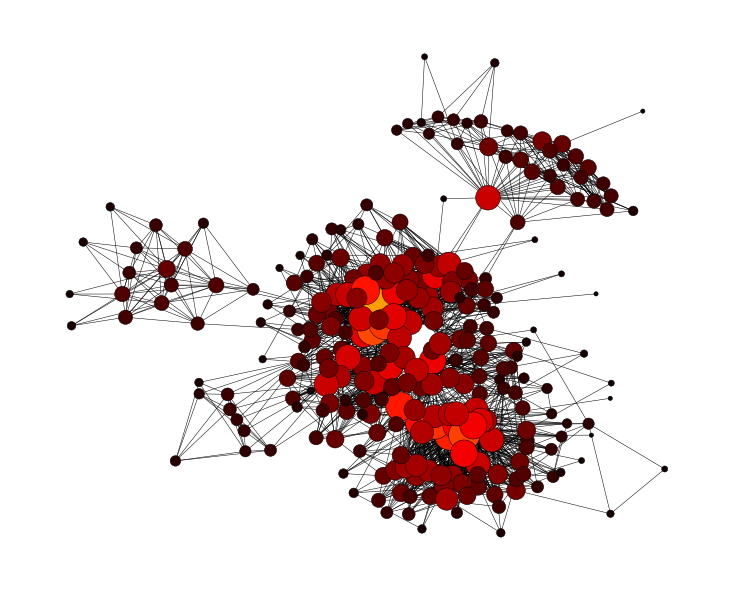

Closeness centrality


,id,centrality
0,182122064,0.308130
1,148242223,0.193956
2,139068288,0.111504
3,174629659,0.093505
4,356272769,0.090939
...,...,...
268,150286138,0.000000
269,184281210,0.000000
270,189048230,0.000000
271,284232104,0.000000


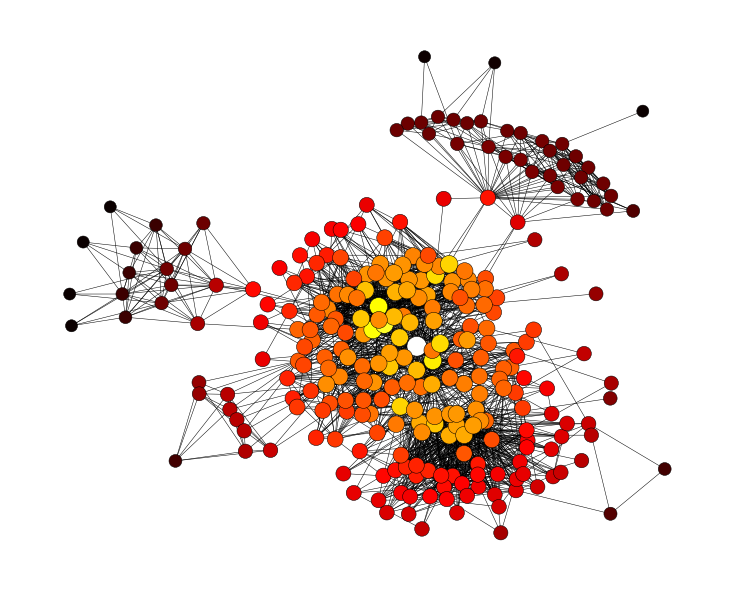

Betweenness centrality


,id,centrality
0,182122064,0.555102
1,356272769,0.481416
2,328751017,0.468158
3,230582966,0.466552
4,162522461,0.457912
...,...,...
268,517592753,0.207317
269,164270131,0.207317
270,85301724,0.207317
271,60576432,0.207159


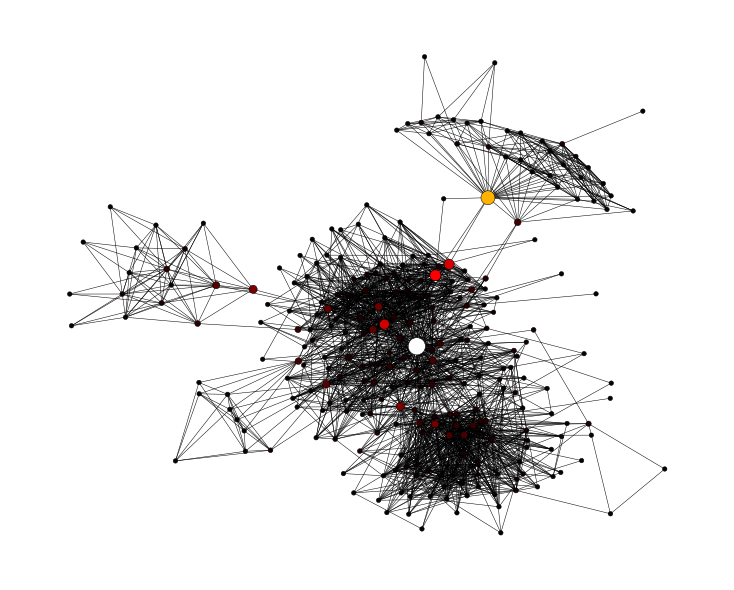

In [7]:
sa.plot_centralities() 

# Строим Katz centality

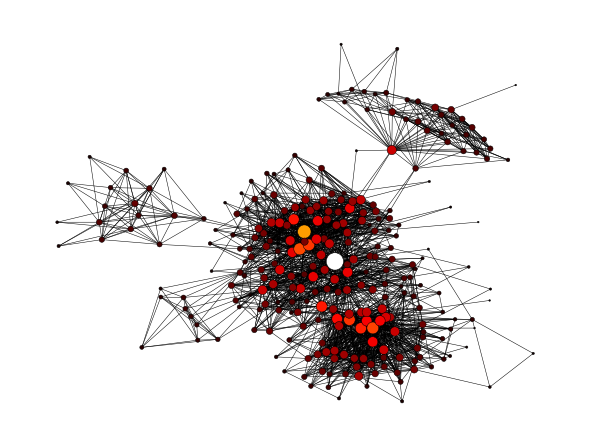

In [8]:
sa.plot_katz_centrality()

# Строим Eigenvector centrality


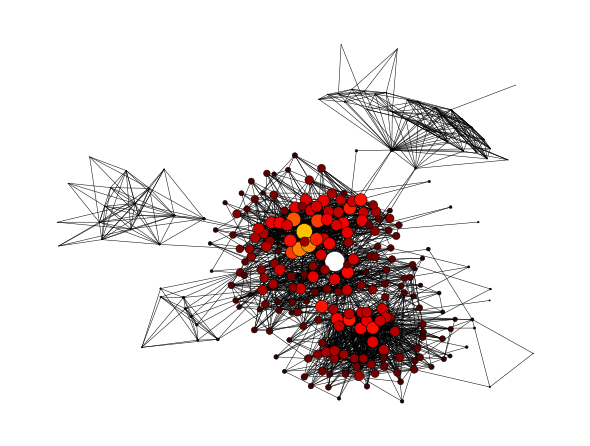

In [9]:
sa.plot_eigenvector_centrality()

# Pearson correlation

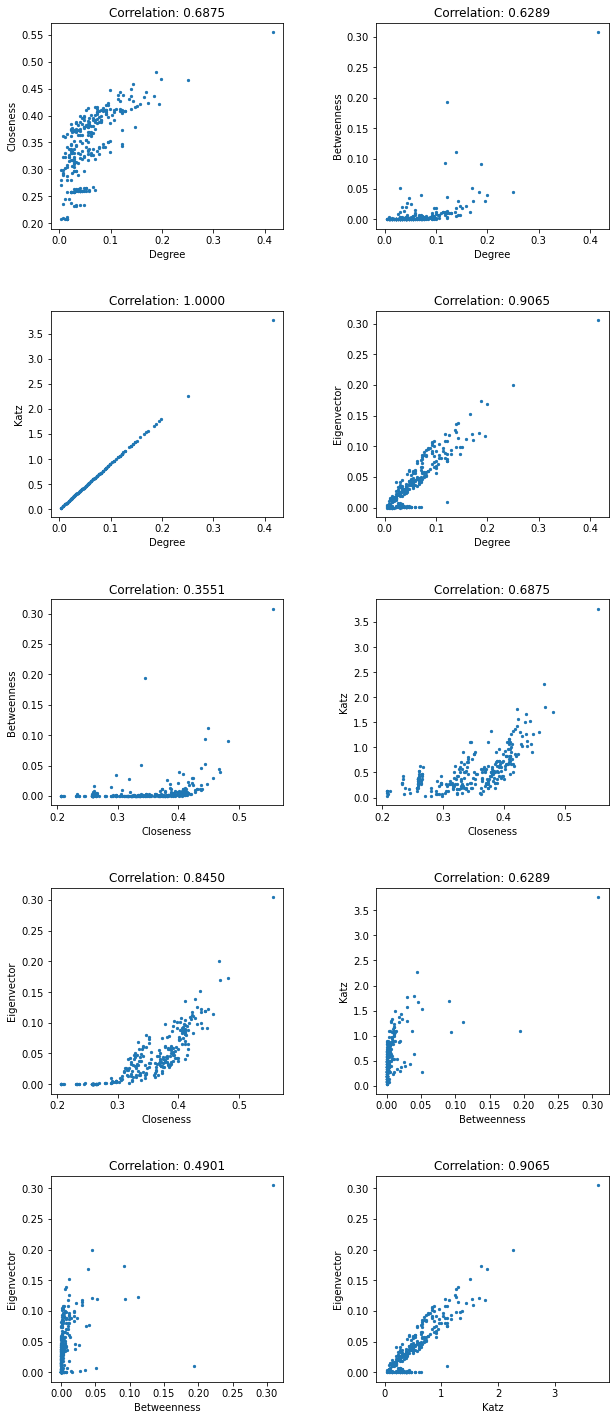

In [10]:
sa.pearson_correlation()

# Community detection
K-core decompose

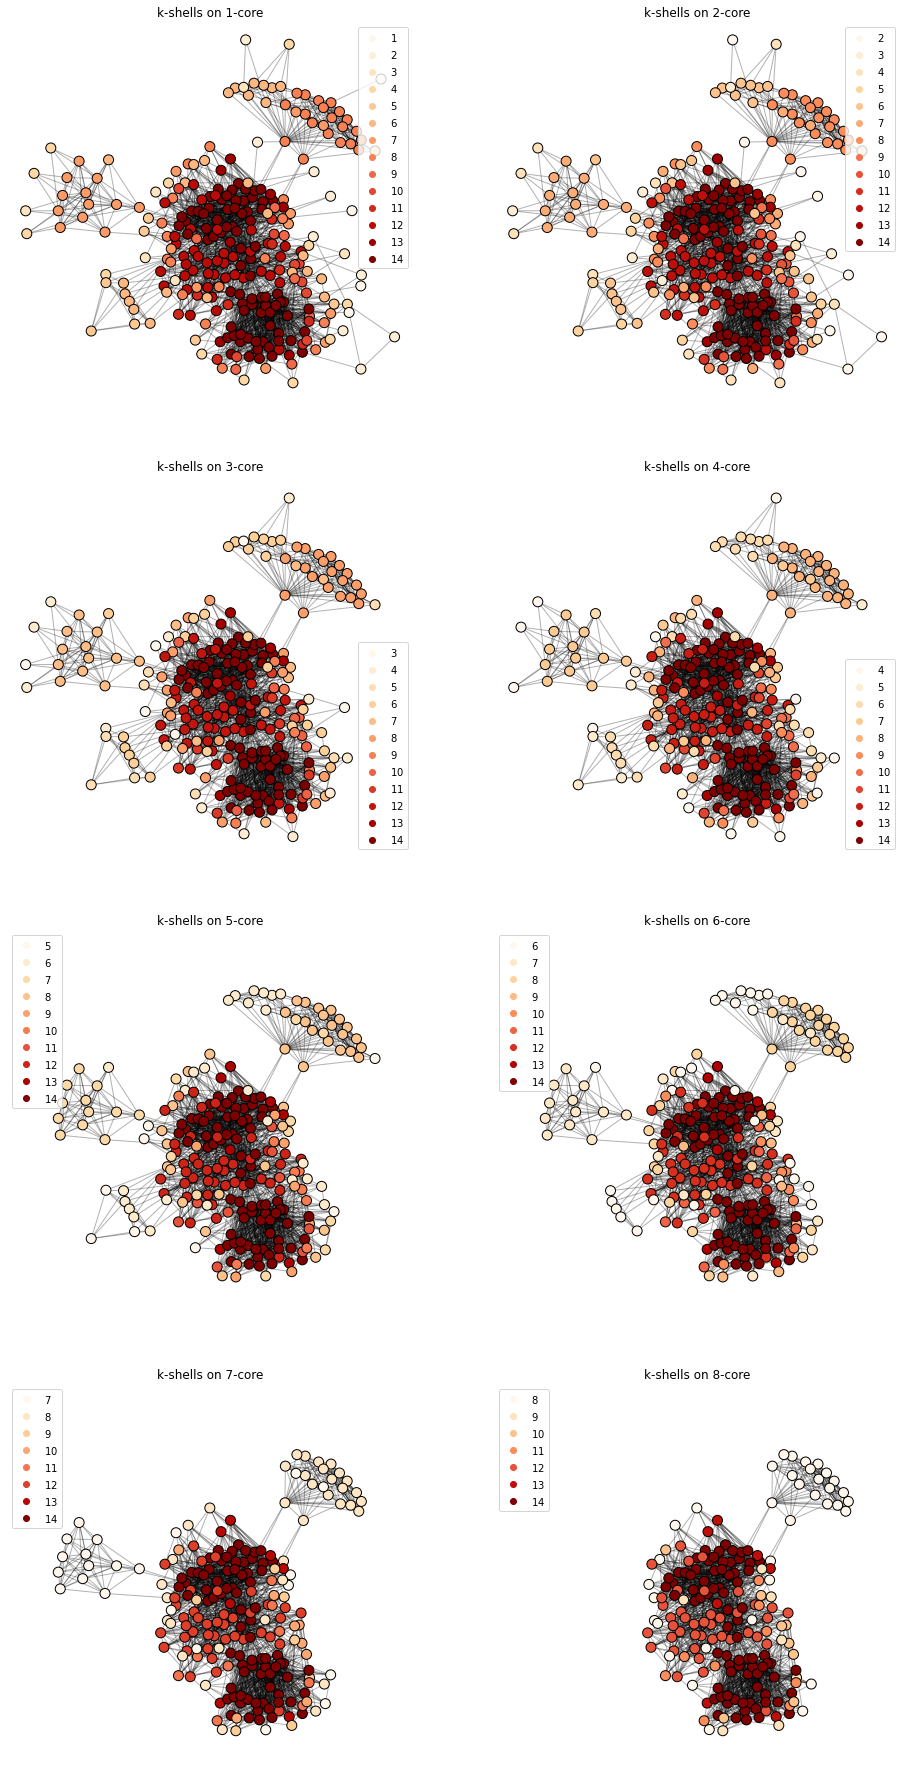

In [11]:
cd = CommunityDetection(mutual)
cd.k_core_visualization()

# Largest cliques

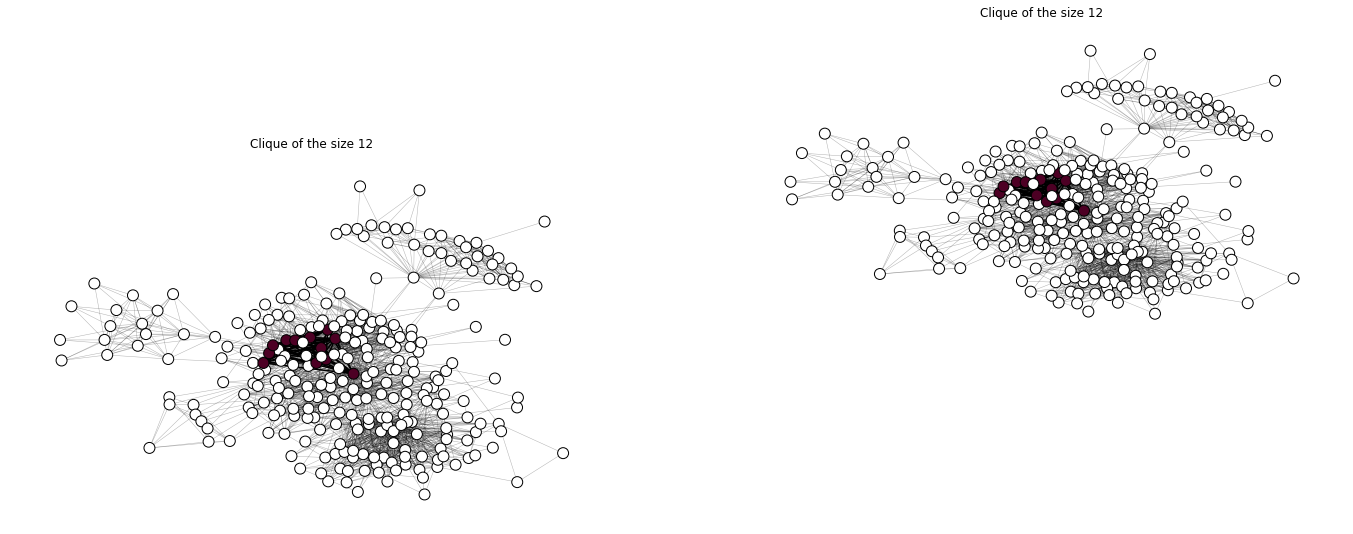

In [12]:
cd.clique_visualization()